In [32]:
import pandas as pd

# Loading Dataset

In [33]:
def load_dataset(path):
    df = pd.read_csv(path, index_col=0)
    df = delete_movies(movies_delete, df)
    return df

In [34]:
def delete_movies(lst, df):
    indices = df[df['movie_name'].isin(lst)].index
    df = df.drop(indices)
    return df

In [35]:
movies_delete = ['Guardians of the Galaxy Vol 2', 'Guardians of the Galaxy',
       'Rocketman', 'The Invisible Man', '12 Years a Slave',
       'Murder on the Orient Express', 'X-Men', 'Teen Wolf']

In [36]:
movies_df = load_dataset('data/all_movies.csv')
delete_movies(movies_delete, movies_df)
movies_df.head()

,movie_name,index,utterance,count_utterances,tag
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism
2,12 Angry Men,2,Shh. Shh.,2065,racism
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism


In [37]:
movies_df.shape

(351280, 5)

# Word Embedding

In [38]:
annotations_word_embedding_fox_news_df = load_dataset('annotations/annotations_word_embedding_fox_news.csv')
annotations_word_embedding_fox_news_df.rename(columns={'label': 'we_label_fox_news'}, inplace=True)
annotations_word_embedding_fox_news_df

,movie_name,index,we_label_fox_news
0,12 Angry Men,0,not hate speech
1,12 Angry Men,1,not hate speech
2,12 Angry Men,2,not hate speech
3,12 Angry Men,3,not hate speech
4,12 Angry Men,4,hate speech
...,...,...,...
359031,You,1767,not hate speech
359032,You,1768,not hate speech
359033,You,1769,not hate speech
359034,You,1770,not hate speech


In [8]:
annotations_word_embedding_twitter_df = load_dataset('annotations/annotations_word_embedding_twitter.csv')
annotations_word_embedding_twitter_df.rename(columns={'label': 'we_label_twitter'}, inplace=True)
annotations_word_embedding_twitter_df

,movie_name,index,we_label_twitter
0,12 Angry Men,0,neither
1,12 Angry Men,1,neither
2,12 Angry Men,2,offensive language
3,12 Angry Men,3,neither
4,12 Angry Men,4,neither
...,...,...,...
359031,You,1767,offensive language
359032,You,1768,neither
359033,You,1769,neither
359034,You,1770,offensive language


# Bert

In [9]:
annotations_bert_fox_news_df = load_dataset('annotations/annotations_bert_fox_news.csv')
annotations_bert_fox_news_df.rename(columns={'label': 'bert_label_fox_news'}, inplace=True)
annotations_bert_fox_news_df

,index,movie_name,bert_label_fox_news
0,0,1917,hate speech
1,1,1917,not hate speech
2,2,1917,not hate speech
3,3,1917,not hate speech
4,4,1917,not hate speech
...,...,...,...
360126,1032,Wrong Turn,not hate speech
360127,1033,Wrong Turn,not hate speech
360128,1034,Wrong Turn,hate speech
360129,1035,Wrong Turn,not hate speech


In [10]:
annotations_bert_twitter_df = load_dataset('annotations/annotations_bert_twitter.csv')
annotations_bert_twitter_df.rename(columns={'label': 'bert_label_twitter'}, inplace=True)
annotations_bert_twitter_df

,index,movie_name,bert_label_twitter
0,0,1917,neither
1,1,1917,neither
2,2,1917,neither
3,3,1917,neither
4,4,1917,neither
...,...,...,...
360126,1032,Wrong Turn,neither
360127,1033,Wrong Turn,neither
360128,1034,Wrong Turn,neither
360129,1035,Wrong Turn,offensive language


# LSTM

In [11]:
annotations_lstm_fox_news_df = load_dataset('annotations/annotations_lstm_fox_news.csv')
annotations_lstm_fox_news_df.rename(columns={'label': 'lstm_label_fox_news'}, inplace=True)
annotations_lstm_fox_news_df

,movie_name,index,lstm_label_fox_news
0,A Time to Kill,0,not hate speech
1,A Time to Kill,1,not hate speech
2,A Time to Kill,2,not hate speech
3,A Time to Kill,3,not hate speech
4,A Time to Kill,4,not hate speech
...,...,...,...
359031,Wind River,1264,not hate speech
359032,Wind River,1265,not hate speech
359033,Wind River,1266,not hate speech
359034,Wind River,1267,hate speech


In [12]:
annotations_lstm_twitter_df = load_dataset('annotations/annotations_lstm_twitter.csv')
annotations_lstm_twitter_df.rename(columns={'label': 'lstm_label_twitter'}, inplace=True)
annotations_lstm_twitter_df

,movie_name,index,lstm_label_twitter
0,Falling Down,0,offensive language
1,Falling Down,1,offensive language
2,Falling Down,2,offensive language
3,Falling Down,3,neither
4,Falling Down,4,offensive language
...,...,...,...
359031,The Social Network,2405,offensive language
359032,The Social Network,2406,offensive language
359033,The Social Network,2407,offensive language
359034,The Social Network,2408,neither


# Joining Datasets

In [13]:
df_results = movies_df.merge(annotations_word_embedding_fox_news_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_word_embedding_twitter_df, on=['index', 'movie_name'])

In [14]:
df_results = df_results.merge(annotations_bert_twitter_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_bert_fox_news_df, on=['index', 'movie_name'])

In [15]:
df_results = df_results.merge(annotations_lstm_twitter_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_lstm_fox_news_df, on=['index', 'movie_name'])

In [16]:
df_results.head()

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech


In [17]:
df_results.head(2)

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech


In [18]:
df_results.to_csv('results.csv')

#### Analyzing all dataset values

## Analyse Results

In [27]:
def plot_label_by_tag_distribution(df, title, label):
    df = df_results.groupby('tag')[label].value_counts().to_frame('count').reset_index()
    df_pivot = pd.pivot_table(
        df,
        values="count",
        index="tag",
        columns=label
    )
    ax = df_pivot.plot(kind='bar', title=title)
    return ax

In [28]:
def plot_label_by_tag_distribution_percentage(df, title, label):
    ax = df_results.groupby('tag')[label].value_counts(normalize=True).unstack().plot(kind='bar', stacked = True, title=title)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        a = round(x + width/2, 2)
        b = round(y + height*1.00, 2)
        height = round(height, 2)
        ax.annotate(f'{height}', (a, b), ha='center')
    ax.legend(bbox_to_anchor=(1.5, 1))
    return ax

# Word embedding

## Fox News

<AxesSubplot:title={'center':'Label by tag distribution'}, xlabel='tag'>

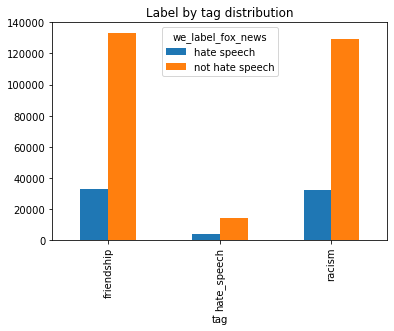

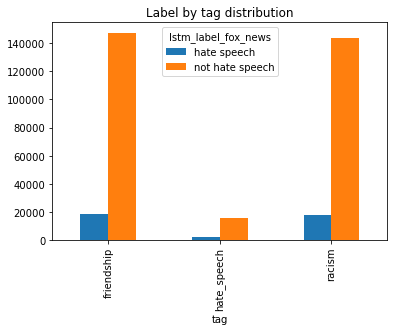

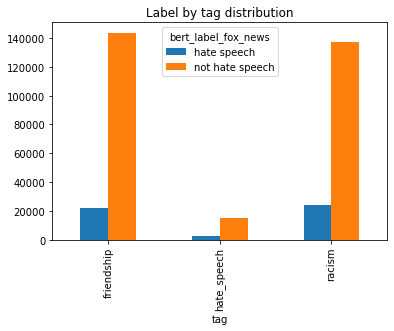

In [29]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='we_label_fox_news')
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='lstm_label_fox_news')
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='bert_label_fox_news')

<AxesSubplot:title={'center':'Bert, Label by tag distribution (Percentage)'}, xlabel='tag'>

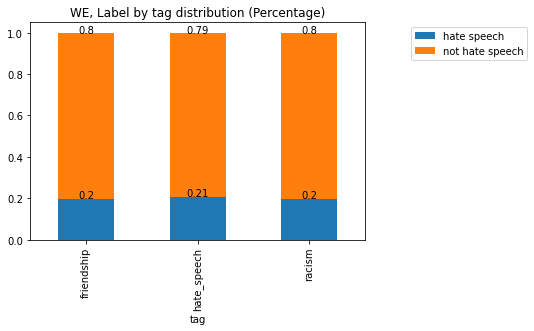

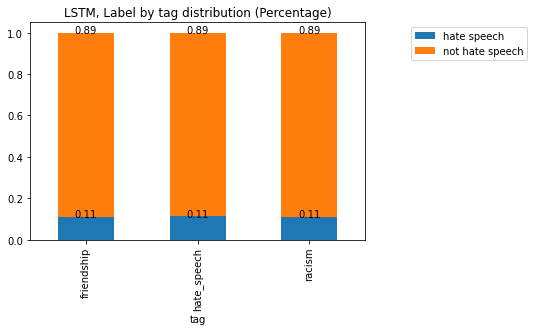

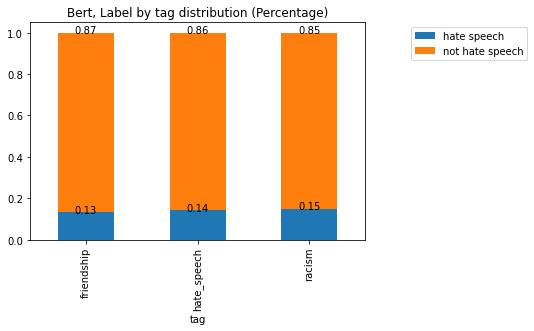

In [30]:
plot_label_by_tag_distribution_percentage(df_results, title='WE, Label by tag distribution (Percentage)', label='we_label_fox_news')
plot_label_by_tag_distribution_percentage(df_results, title='LSTM, Label by tag distribution (Percentage)', label='lstm_label_fox_news')
plot_label_by_tag_distribution_percentage(df_results, title='Bert, Label by tag distribution (Percentage)', label='bert_label_fox_news')

## hate speech examples

In [31]:
hatespeech_sentences = df_results[df_results.label_fox_news=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

AttributeError: 'DataFrame' object has no attribute 'label_fox_news'

# Word embedding

## Twitter

In [ ]:
plot_label_by_tag_distribution(df_results, title='WE, Label by tag distribution', label='we_label_twitter')
plot_label_by_tag_distribution(df_results, title='LSTM, Label by tag distribution', label='lstm_label_twitter')
plot_label_by_tag_distribution(df_results, title='Bert, Label by tag distribution', label='bert_label_twitter')

In [ ]:
plot_label_by_tag_distribution_percentage(df_results, title='WE, Label by tag distribution (Percentage)', label='we_label_twitter')
plot_label_by_tag_distribution_percentage(df_results, title='LSTM, Label by tag distribution (Percentage)', label='lstm_label_twitter')
plot_label_by_tag_distribution_percentage(df_results, title='Bert, Label by tag distribution (Percentage)', label='bert_label_twitter')

In [ ]:
hatespeech_sentences = df_results[df_results.label_twitter=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

## Intersections

### both are "hate speech"

In [ ]:
df_intersections = df_results[(df_results.label_twitter=='hate speech')&(df_results.label_fox_news=='hate speech')]

In [ ]:
df_intersections

### fox news is "hate speech" and twitter is "offensive language"

In [ ]:
df_intersections = df_results[(df_results.label_twitter=='offensive language')&(df_results.label_fox_news=='hate speech')]

In [ ]:
df_intersections

In [ ]:
df_results

In [ ]:
label = 'hate speech'

In [ ]:
df_results[(df_results.we_label_twitter==label) & (df_results.lstm_label_twitter==label) & (df_results.bert_label_twitter==label)]

In [ ]:
df_results[(df_results.movie_name=='BlacKkKlansman') & (df_results.bert_label_twitter=='hate speech')][['utterance', 'bert_label_twitter', 'lstm_label_twitter', 'we_label_twitter']]